In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from flipper_training.configs.robot_config import RobotModelConfig, get_flipper_pointwise_vels
import matplotlib.pyplot as plt

In [3]:
cfg = RobotModelConfig("marv")

Loading robot model from cache: /Users/davidkorcak/Documents/ctu/bachelors/flipper_training/.robot_cache/marv_0.080_192_bv0.01_whl0.02_trck0.05.pt
Robot has 1023 points


In [4]:
cfg.flipper_wheels

[{'wheel_radii': tensor([0.1000, 0.0650]),
  'wheel_positions': tensor([[0.2565, 0.2500, 0.0000],
          [0.5580, 0.2870, 0.0000]]),
  'rotation_vector': tensor([0., 1., 0.])},
 {'wheel_radii': tensor([0.1000, 0.0650]),
  'wheel_positions': tensor([[ 0.2560, -0.2500,  0.0000],
          [ 0.5580, -0.2870,  0.0000]]),
  'rotation_vector': tensor([0., 1., 0.])},
 {'wheel_radii': tensor([0.1000, 0.0650]),
  'wheel_positions': tensor([[-0.2560,  0.2500,  0.0000],
          [-0.5580,  0.2870,  0.0000]]),
  'rotation_vector': tensor([0., 1., 0.])},
 {'wheel_radii': tensor([0.1000, 0.0650]),
  'wheel_positions': tensor([[-0.2567, -0.2500,  0.0000],
          [-0.5580, -0.2870,  0.0000]]),
  'rotation_vector': tensor([0., 1., 0.])}]

In [5]:
flipper_idx = 0
mask = cfg.driving_part_masks[flipper_idx].bool()
points = cfg.robot_points[mask]
wheels = cfg.flipper_wheels[flipper_idx]
mask, points, wheels

(tensor([ True,  True,  True,  ..., False, False, False]),
 tensor([[ 3.5682e-01,  2.8550e-01, -2.1449e-02],
         [ 3.5061e-01,  2.8548e-01, -3.6773e-02],
         [ 3.5718e-01,  2.8549e-01, -1.7052e-02],
         [ 3.9513e-01,  2.8426e-01, -9.2490e-02],
         [ 4.2562e-01,  2.8508e-01, -8.6798e-02],
         [ 3.5935e-01,  2.8550e-01, -1.2134e-03],
         [ 3.5381e-01,  2.8545e-01,  4.5319e-03],
         [ 3.4124e-01,  2.8549e-01, -5.5738e-02],
         [ 3.6500e-01,  2.8550e-01, -9.3902e-02],
         [ 3.0920e-01,  2.8547e-01, -8.2311e-02],
         [ 3.3053e-01,  2.8549e-01, -7.0305e-02],
         [ 3.1597e-01,  2.8549e-01, -8.3624e-02],
         [ 3.3519e-01,  2.8386e-01, -1.0127e-01],
         [ 3.0617e-01,  2.8318e-01, -1.0637e-01],
         [ 2.9374e-01,  2.8547e-01, -9.1185e-02],
         [ 2.9206e-01,  2.8542e-01,  9.1355e-02],
         [ 1.7083e-01,  2.8546e-01, -4.8707e-02],
         [ 2.7873e-01,  2.8549e-01, -9.9263e-02],
         [ 2.7635e-01,  2.8262e-01, -1.11

In [6]:
vels  = get_flipper_pointwise_vels(points, wheels, cfg.driving_direction, 0.02, 0.05)

/Users/davidkorcak/Documents/ctu/bachelors/flipper_training/utils/flipper_modeling.py:50: UserWarning: Using torch.cross without specifying the dim arg is deprecated.
Please either pass the dim explicitly or simply use torch.linalg.cross.
The default value of dim will change to agree with that of linalg.cross in a future release. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Cross.cpp:66.)
  rot_axis = torch.cross(rot_vec_norm, torch.tensor([0.0, 0.0, 1.0]))


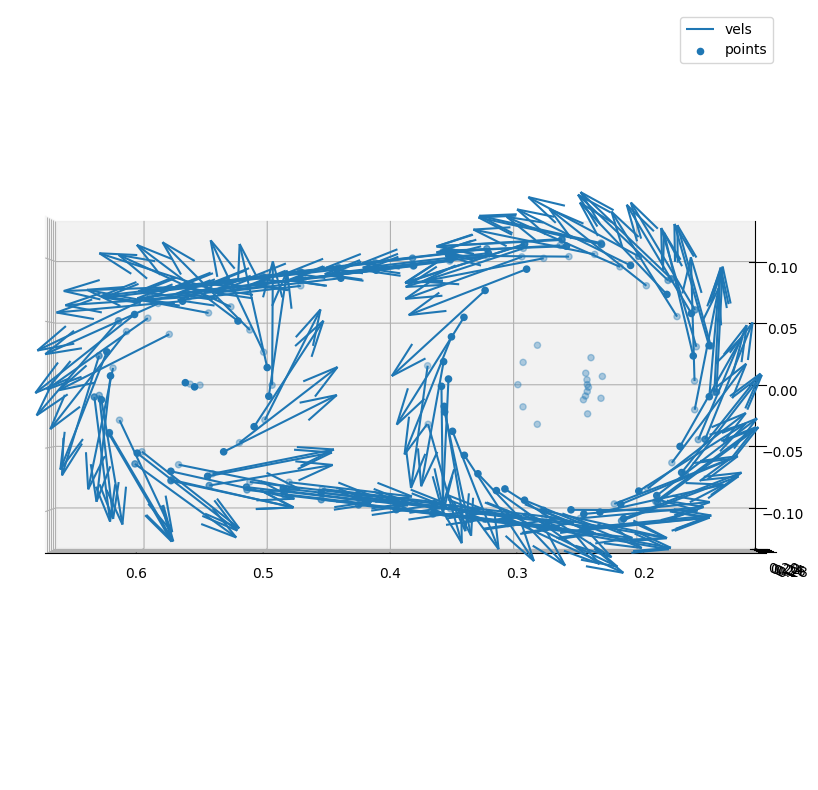

In [7]:
plt.ion()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.quiver(
    points[:, 0],
    points[:, 1],
    points[:, 2],
    vels[:, 0],
    vels[:, 1],
    vels[:, 2],
    length=0.1,
    label="vels",
)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], label="points")
ax.legend()
ax.set_aspect("equal")
ax.view_init(0, 90)

In [8]:
cfg.visualize_robot()

Robot has 1023 points


2025-02-20 13:36:07.607 Python[45837:968428] ApplePersistenceIgnoreState: Existing state will not be touched. New state will be written to /var/folders/yj/_6b0pqvs5xg33v_xy5q2v9_40000gn/T/org.python.python.savedState


Widget(value='<iframe src="http://localhost:50745/index.html?ui=P_0x177967fb0_0&reconnect=auto" class="pyvista…